# Проект: Создание дашборда для Яндекс.Дзен. #

## Описание проекта. ##

Необходимо используя данные Яндекс.Дзен, построить дашборд для еженедельного анализа, с метриками взаимодействия пользователей с карточками Яндекс.Дзен. Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. 
В ходе выполнения ТЗ необходимо произвести коннекцию к базе данных PostgreSQL, сделать запись данных из базы в .csv-файл, создать дашборд в Tableau и презентацию для менеджеров.

### Структура данных. ###

Таблица хранится в специально подготовленной для нас базе данных *zen*
Источники данных для дашборда: 

- <b>record_id</b> — первичный ключ;
- <b>item_topic</b> — тема карточки;
- <b>source_topic</b> — тема источника;
- <b>age_segment</b> — возрастной сегмент;
- <b>dt</b> — дата и время;
- <b>visits</b> — количество событий.

### Краткое ТЗ. ###

- Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;

Состав данных для дашборда:
- История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
- Разбивка событий по темам источников;
- Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
    - Дата и время;
    - Тема карточки;
     - Тема источника;
    - Возрастная группа;

Характер данных:
- История событий по темам карточек — абсолютные величины с разбивкой по минутам;
- Разбивка событий по темам источников — относительные величины (% событий);
- Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Частота обновления данных: один раз в сутки, в полночь по UTC;

Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

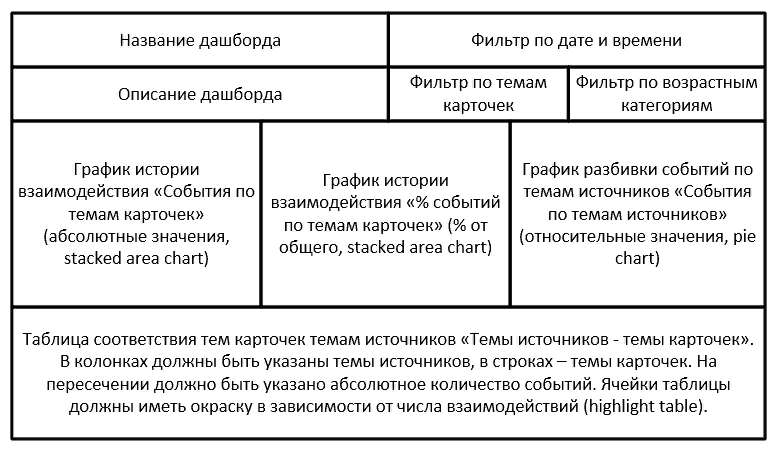

### План выполнения проекта. ###

<b>Шаг 1.</b> Запрос к базе данных и изучение общей информации.<br>
<b>Шаг 2.</b> Выгрузка данных в файл.<br>
<b>Шаг 3.</b> Создание дашборда и презентации.

## Шаг 1. Запрос к базе данных и изучение общей информации. ##

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

# формируем строку соединения с БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

# подключаемся к БД
engine = create_engine(connection_string) 

In [3]:
# формируем sql-запрос
query = '''SELECT *
           FROM dash_visits
'''

In [4]:
# выполняем запрос и сохраняем результат
data_raw  = pd.io.sql.read_sql(query, con = engine)

In [16]:
display(data_raw.head(5))

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [6]:
# изучим общую информацию
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [7]:
# проверим датасет на наличие дубликатов
data_raw.duplicated().sum()

0

***Вывод:***

- Пропуски в данных отсутствуют;
- Столбцы имеют корректный формат данных;
- Дубликаты отсуствуют.

## Шаг 2. Выгрузка данных в файл. ##

In [8]:
# выгружаем данные из таблицы в файл dash_visits.csv
data_raw.to_csv('dash_visits.csv', index = False, sep = '\t')

In [11]:
# проверям корретность выгрузки
df = pd.read_csv('dash_visits.csv', sep = '\t')

In [15]:
display(df)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


***Вывод:***
- Данные успешно экспортированы в cvs файл, приступаем к созданию дашборда и презентации.

## Шаг 3. Создание дашборда и презентации. ##

Ссылка на дашборд : https://public.tableau.com/app/profile/alexander4262/viz/automation_project_dashboard/Dashboard1

Ссылка на облачное хранилище c презентацией: https://drive.google.com/file/d/1xaBwXYcgm9VRdMEOnlLn3QhCxWeju0MT/view?usp=share_link